##### 第6题  构造$3\times3$的随机矩阵A，求它的逆矩阵B, 计算C=B*A和C=B点乘A，然后计算C的方根E和E的绝对值。

In [1]:
import numpy as np, matplotlib.pyplot as plt

In [2]:
A = np.random.random((3,3))
B = np.linalg.inv(A)

In [7]:
C=A*B
D = np.dot(A,B)

array([[  1.42043134, -16.92494145,   3.37363288],
       [ -0.31078121,   0.02109368,   0.16159629],
       [ -0.17312253,  16.9065725 ,  -2.70305489]])

In [4]:
E = np.sqrt(C)
np.abs(E)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([[       nan, 0.51264069, 2.97320192],
       [       nan, 1.01403813,        nan],
       [3.0016322 ,        nan,        nan]])

##### 第7题：求当$x=1,2,3,\cdots,100$时，$y=x^2+sin(x)+ln x$的值

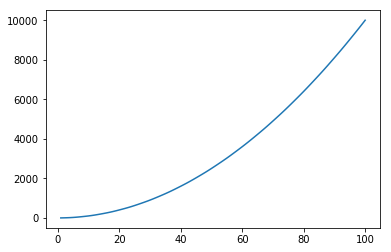

In [9]:
x = np.arange(1,101)
y = x**2+np.sin(x) + np.log(x)
plt.plot(x,y)

##### 第8题：

绘制简谐振动位移曲线。简谐振动的运动学方程是$x=Asin(\omega t+\phi)$。（要求：任意取$A, \phi$的值，但$\omega$要取$\omega_1, \omega_2$两个值，画两条曲线，分别用红色和蓝色曲线表示。）

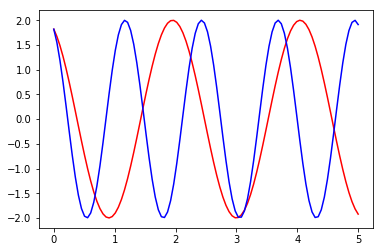

In [10]:
A, phi = 2,2
omega1,omega2 = 3,5
t = np.linspace(0,5,100)
x1 = A*np.sin(omega1*t+phi)
x2 = A*np.sin(omega2*t+phi)
plt.plot(t,x1, 'r', t, x2, 'b')

##### 9. 计算下列复变函数

(1) 3+5i/(1+i); (2)sin(4+5i); (3) ln(3+2i); (4) lg(3+2i); (5)sh(3+2i)

In [11]:
print(3+5j/(1+1j), np.sin(4+5j), np.log(3+2j), np.log10(3+2j), np.sinh(3+2j))

(5.5+2.5j) (-56.16227422023235-48.50245524177091j) (1.2824746787307684+0.5880026035475675j) (0.5569716761534184+0.25536628606545403j) (-4.168906959966565+9.15449914691143j)


##### 第10题：在指令窗口输入A=[], B=np.zeros((3,3)), C=np.eye(3)看看结果是什么？

In [13]:
A=[]
B=np.zeros((3,3))
C=np.eye(3)

##### 第11题:生成一个幻方矩阵A. 做如下操作：
    (1): 取矩阵A的上三角部分a和下三角部分b;
    (2): 求A各列元素之和c, 各行元素之和d, 及各列的中值e;
    (3): 求A的对角矩阵f和转置矩阵g;
    (4): 对A进行以下操作：左右旋转得到h, 上下旋转得到i, 旋转90度得到j
    (5): 对A进行升序排列得到k;

In [14]:
def magic_odd(n):
    if n % 2 == 0:
        raise ValueError('n must be odd')
    return np.mod((np.arange(n)[:, None] + np.arange(n)) + (n-1)//2+1, n)*n + \
          np.mod((np.arange(1, n+1)[:, None] + 2*np.arange(n)), n) + 1


def magic_double_even(n):
    if n % 4 != 0:
        raise ValueError('n must be a multiple of 4')
    M = np.empty([n, n], dtype=int)
    M[:, :n//2] = np.arange(1, n**2//2+1).reshape(-1, n).T
    M[:, n//2:] = np.flipud(M[:, :n//2]) + (n**2//2)
    M[1:n//2:2, :] = np.fliplr(M[1:n//2:2, :])
    M[n//2::2, :] = np.fliplr(M[n//2::2, :])
    return M
def magic_matrix(n):
    n = int(n)
    if n < 3:
        raise ValueError("Size must be at least 3")
    if n % 2 == 1:
        p = np.arange(1, n+1)
        return n*np.mod(p[:, None] + p - (n+3)//2, n) + np.mod(p[:, None] + 2*p-2, n) + 1
    elif n % 4 == 0:
        J = np.mod(np.arange(1, n+1), 4) // 2
        K = J[:, None] == J
        M = np.arange(1, n*n+1, n)[:, None] + np.arange(n)
        M[K] = n*n + 1 - M[K]
    else:
        p = n//2
        M = magic(p)
        M = np.block([[M, M+2*p*p], [M+3*p*p, M+p*p]])
        i = np.arange(p)
        k = (n-2)//4
        j = np.concatenate((np.arange(k), np.arange(n-k+1, n)))
        M[np.ix_(np.concatenate((i, i+p)), j)] = M[np.ix_(np.concatenate((i+p, i)), j)]
        M[np.ix_([k, k+p], [0, k])] = M[np.ix_([k+p, k], [0, k])]
    return M 

In [15]:
A = magic_matrix(3)
print(A)

[[8 1 6]
 [3 5 7]
 [4 9 2]]


In [16]:
#(1): 取矩阵A的上三角部分a和下三角部分b;
a = np.triu(A)
b = np.tril(A)

In [17]:
#(2): 求A各列元素之和c, 各行元素之和d, 及各列的中值e;
c = np.sum(A,axis=1)
d = np.sum(A,axis=0)
e = np.median(A,axis=1)

In [18]:
#    (3): 求A的对角矩阵f和转置矩阵g;
f = np.diagonal(A)
g = A.T

In [19]:
#    (4): 对A进行以下操作：左右旋转得到h, 上下旋转得到i, 旋转90度得到j
h = np.fliplr(A)
i = np.flipud(A)
j = np.rot90(A)

In [20]:
#    (5): 对A进行升序排列得到k;
k = np.sort(A,axis=None).reshape(3,3)

##### 12. 自己编写一个线性代数方程组，利用矩阵除法运算求解，书上例题

$\begin{bmatrix}
3 & 5 & 7\\
2 & -12 & 3\\
-1 & 9 & 8\\
\end{bmatrix}  
\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix}=
\begin{bmatrix}34\\
-56\\
27\end{bmatrix}$

In [21]:
A = np.array([[3,5,-7],[2,-12,3],[-1,9,8]])
b = np.array([34,-56, 27])
Ainv = np.linalg.inv(A)
X = np.dot(Ainv,b)

##### 13. 用命令diag生成一个矩阵，要求对角元素是[1,2,3]. 再思考一下如何生成下面的矩阵：

$\begin{bmatrix}
0 & 0& 0&0\\
1 & 0& 0&0\\
0 & 2& 0&0\\
0 & 0& 3&0\\
\end{bmatrix}$ 和
$\begin{bmatrix}
0 & 1& 0&0\\
0 & 0& 2&0\\
0 & 0& 0&3\\
0 & 0& 0&0\\
\end{bmatrix}$

In [22]:
A = np.diag([1,2,3])
B = np.zeros(3)
C = np.zeros(4)
D = np.vstack([A,B])
L1 = np.vstack([C, D.T])
D = np.vstack([B,A])
L2 = np.vstack([D.T, C])

##### 14. 已知质点的运动方程式

 $x = sin\omega_1 t, y = sin\omega_2 t$, 画出质点的轨迹图，要求频率比
$\omega_1/\omega_2$分别是有理数和无理数。

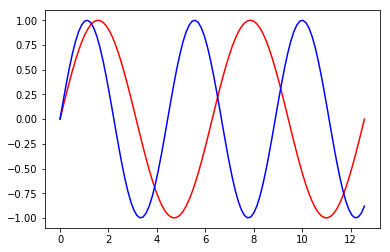

In [23]:
t = np.linspace(0,4*np.pi,100)
A = [1,np.sqrt(2)]
z = np.sin(np.outer(t,A))
plt.plot(t,z[:,0],'r', t, z[:,1],'b')

##### 15. 用plot用两种方法将两个三角形画在一个图形内
(1)实数法：顶点分别为A(-1,0), B(0,1), C(1,0), 用红色、线形为短划线，标志为‘+’， 线粗为3；

(2)复数法：顶点分别为D(-1,0), E(0,i), F(1,0), 用绿色、线形为点线，标志为‘o’，线粗为5

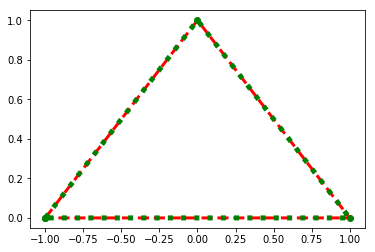

In [24]:
x = [-1, 0, 1,-1]
y = [0, 1, 0, 0]
z = np.array([-1, 1j, 1, -1])
plt.plot(x,y,'r--+',lw=3)
plt.plot(z.real, z.imag, 'g:o', lw=5)

##### 第16题，画出三维曲线

$\begin{align}
        x^2+y^2+z^2=64\\
        y+z=0
        \end{align}$
       
提示：改写为如下方程
       $\left\{\begin{align}
        x=8\cos t\\
        y =4\sqrt{2}\sin t\\
        z = -4\sqrt{2}\sin t
        \end{align}\right.$

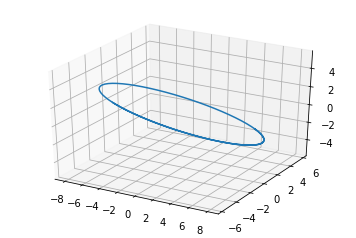

In [25]:
from mpl_toolkits.mplot3d import Axes3D

t = np.linspace(0,3*np.pi,100)
x = 8*np.cos(t)
y = 4*np.sqrt(2)*np.sin(t)
z = -4*np.sqrt(2)*np.sin(t)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x,y,z)

##### 17. 用fplot绘制曲线$\cos(\tan \pi x)$

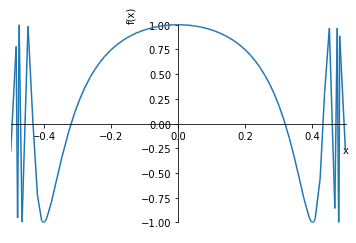

In [26]:
from sympy import plot, cos, tan, pi, symbols
x = symbols('x')
plot(cos(tan(pi*x)), (x,-.5,.5))

##### 18. 用ezplot绘制曲线 $e^y + \frac{\cos x}{x} + y = 0$

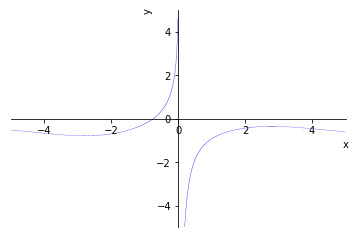

In [28]:
from sympy import plot_implicit, cos, symbols, Eq, exp
x, y  = symbols('x, y')
plot_implicit(Eq(exp(y) + cos(x)/x + y, 0))

##### 19. 用ezsurf绘制曲面
$\left\{\begin{align}
        x &= e^{-s}\cos t\\
        y &= e^{-s}\sin t\\
        z &= t
        \end{align}\right.  \quad (0\le s \le 8, 0 \le t \le 5\pi)$

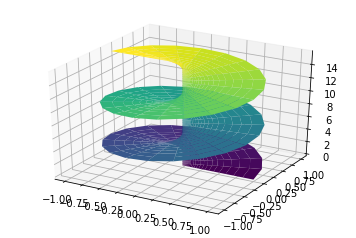

In [54]:
from sympy import symbols, sin, cos, exp
from sympy.plotting import plot3d_parametric_surface
s, t, x, y, z = symbols("s, t, x, y, z")
x = exp(-s)*cos(t)
y = exp(-s)*sin(t)
z = t
plot3d_parametric_surface(x, y, z, (s, 0, 8), (t, 0, 5*pi))

##### 第20题

用subplot分别画出椭球与旋转体。椭球心在(0,0,1), 三个半长轴依次为2,3,4。 旋转体的母线为$1+t^2$

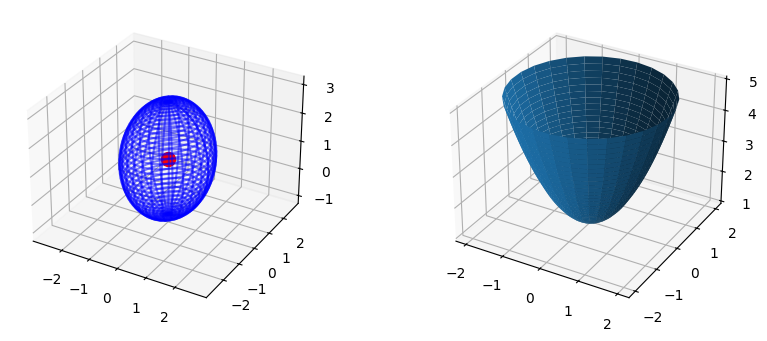

In [21]:
fig=plt.figure(figsize=(10,4))
#画椭球
ax1 = fig.add_subplot(121, projection='3d')
u, v = np.mgrid[0:2*np.pi:30j, 0:np.pi:40j]
a,b,c=np.sqrt((2,3,4))
x = a*np.cos(u)*np.sin(v)
y = b*np.sin(u)*np.sin(v)
z = 1 + c * np.cos(v)
ax1.plot_wireframe(x, y, z, color="b",alpha=0.5)
ax1.scatter(0,0,1,s=100, color='r')
plt.axis('equal')

#画旋转体
ax2 = fig.add_subplot(122, projection='3d')
r, phi = np.mgrid[0:2:40j, 0:2*np.pi:30j]
z = 1+r**2
x, y = r*np.cos(phi), r*np.sin(phi)
ax2.plot_surface(x, y, z)

##### 第21题: 画曲面  $z = x^2y+\frac{\sqrt{y}}{x}\quad (-5\le x\le 5, 0 \le y \le 10)$

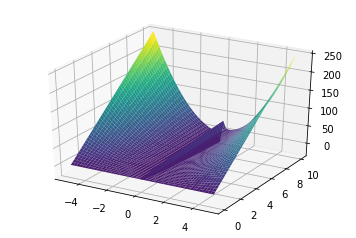

In [4]:
from sympy import symbols, sqrt
from sympy.plotting import plot3d
x, y = symbols('x, y')
plot3d(x**2*y + sqrt(y)/x, (x,-5,5), (y,0,10))

##### 第22题  分别画复变函数$e^z, z^{1/5}$的图形，注意观察多值函数的图形。

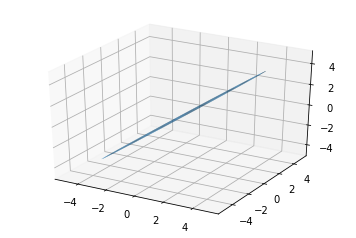

In [32]:
r, theta = np.mgrid[0:5:20j, 0:2*np.pi:20j]
z =r*np.exp(theta*1j)
x, y = r*np.cos(theta), r*np.sin(theta)
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')
_=ax.plot_surface(x, y, z.real)

##### 第23题

画出四种本征函数系$\sin(n\pi x/l)$, $\cos(n\pi x/l)$, $\sin[(n+1/2)\pi x/l]$, $\cos[(n+1/2)\pi x/l]$的图形，其中$n$取1，2，3，4。


再画这四个函数乘以时间因子$\cos(n\pi at/l)$所得的驻波图形。

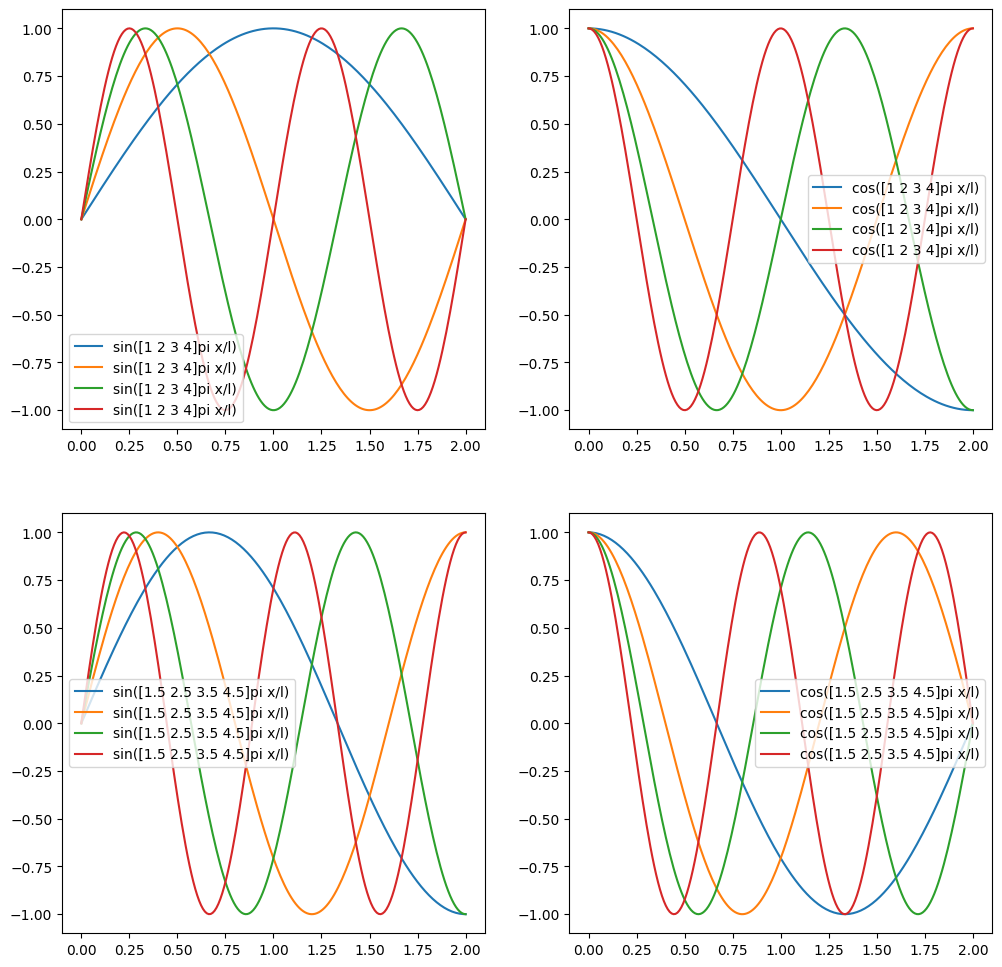

In [16]:
import numpy as np, matplotlib.pyplot as plt
fig, axes = plt.subplots(2,2,figsize=(12,12))
axes = axes.ravel()
func = [np.sin, np.cos, np.sin, np.cos]
additions = [0, 0, 1/2, 1/2]
l = 2
n = np.array([1,2,3,4])
x = np.linspace(0,l,200)
for ii in range(4):
    y = func[ii](np.pi*np.outer(n+additions[ii], x)/l)
    for i in range(4):
        axes[ii].plot(x,y[i,:],label=f'{func[ii].__name__}({n+additions[ii]}pi x/l)')
        axes[ii].legend()

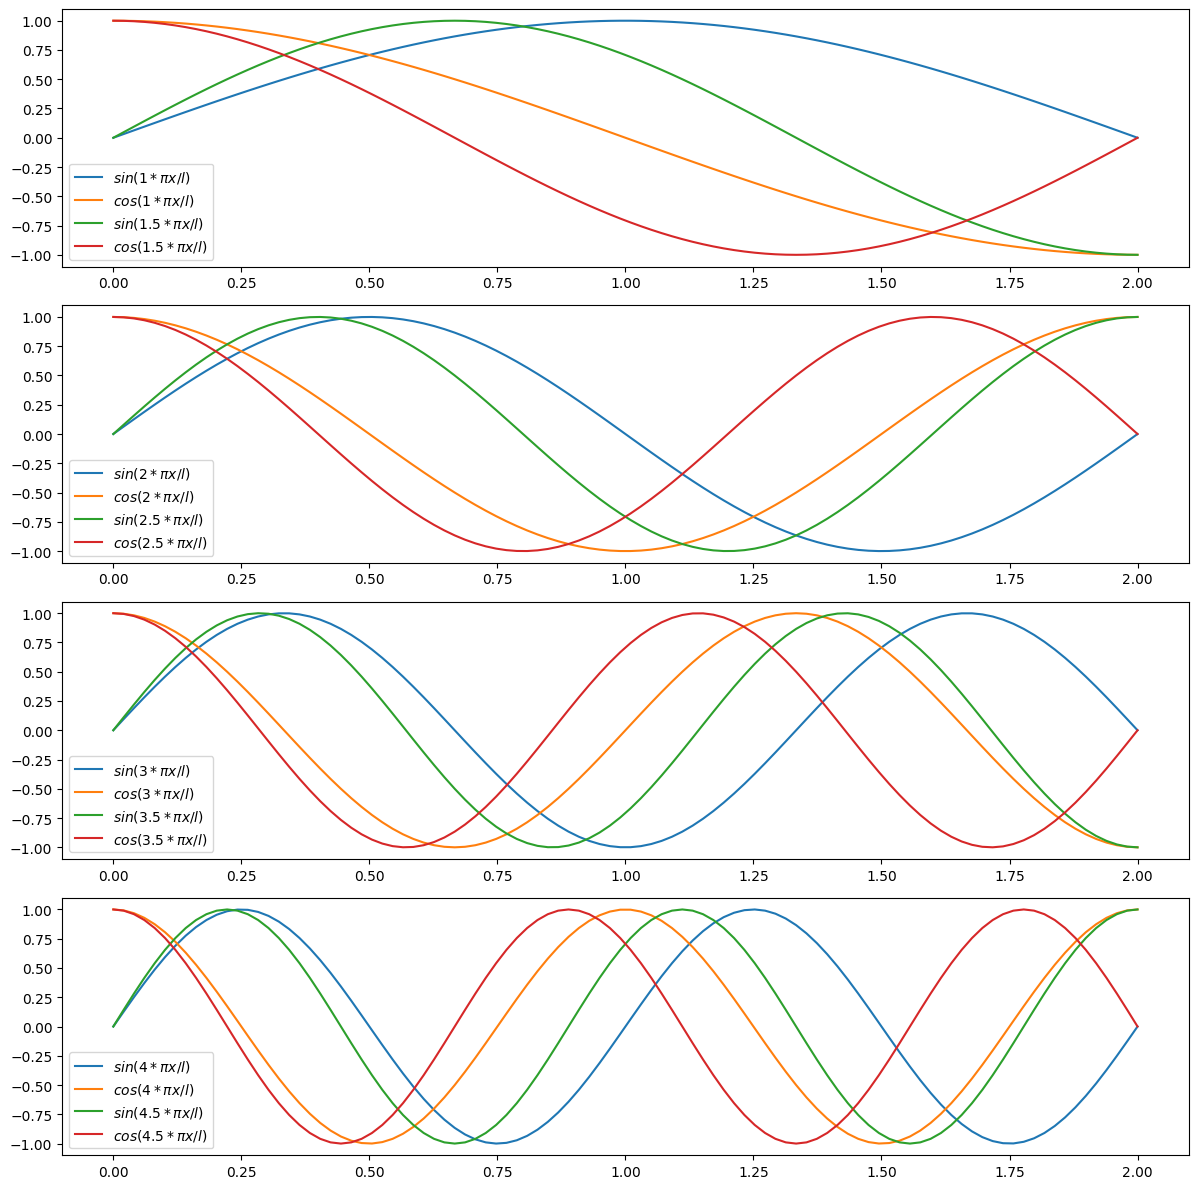

In [20]:
import numpy as np, matplotlib.pyplot as plt
fig, axes = plt.subplots(4,1,figsize=(12,12))
axes = axes.ravel()
func = [np.sin, np.cos, np.sin, np.cos]
additions = [0, 0, 1/2, 1/2]
l = 2
n = np.arange(1,5)
x = np.linspace(0,l,100)
for n in range(1,5):
    for i in range(4):
        y = func[i](((n+additions[i])*np.pi*x/l))
        axes[n-1].plot(x,y,label = f'${func[i].__name__}({n+additions[i]}*\pi x/l)$')
        axes[n-1].legend()
plt.tight_layout()

#### 在plt.plot(x,y), x对应多组y

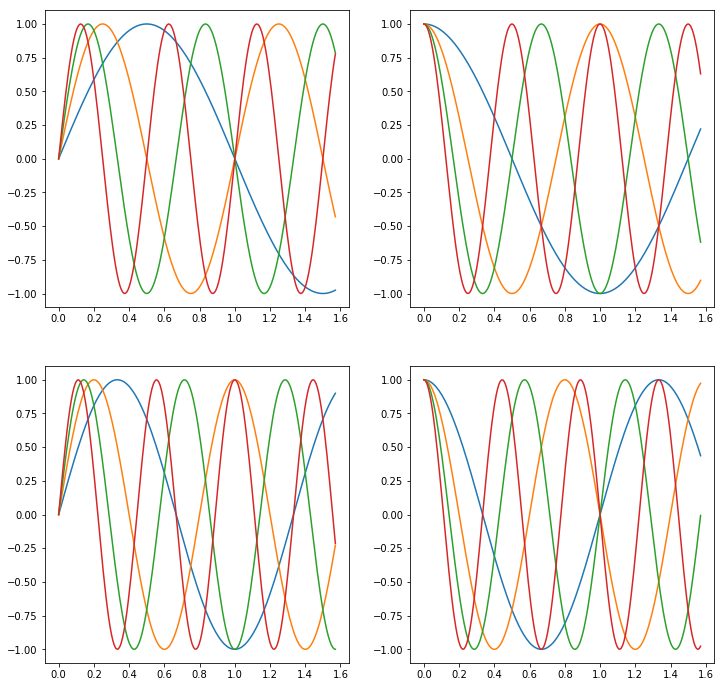

(200, 4)


In [26]:
import numpy as np, matplotlib.pyplot as plt
fig, axes = plt.subplots(2,2,figsize=(12,12))
axes = axes.ravel()
func = [np.sin, np.cos, np.sin, np.cos]
additions = [0, 0, 1/2, 1/2]
l = 1
n = np.array([1,2,3,4])
x = np.linspace(0,np.pi/2,200)
for ii in range(4):
    y = func[ii](np.pi*np.outer(n+additions[ii], x))
    axes[ii].plot(x, y.T)
plt.show()
print(y.T.shape)

这四个函数乘以时间因子$\cos(n\pi at/l)$所得的驻波图形, 待检验

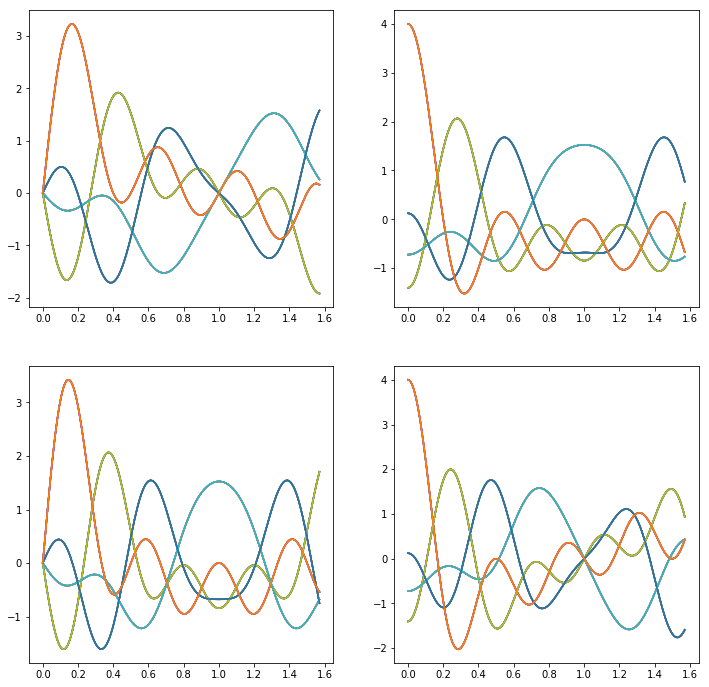

In [27]:
fig, axes = plt.subplots(2,2,figsize=(12,12))
axes = axes.ravel()
func = [np.sin, np.cos, np.sin, np.cos]
additions = [0, 0, 1/2, 1/2]
l = 1
a = 1
n = np.array([1,2,3,4])
x = np.linspace(0,np.pi/2,200)
t = np.linspace(0,4,8)
for ii in range(4):
    y = np.dot(np.cos(a*np.pi*np.outer(n,t)/l).T,func[ii](np.pi*np.outer(n+additions[ii], x)/l))
    for i in range(4):
        axes[ii].plot(x,y.T)

##### 24. 两列行波分别从A，B两点相向而行，相遇后产生叠加，以动画表示

In [33]:
%matplotlib qt5
def gauss(x, x0):
    return np.exp(-(x-x0)**2)
x = np.linspace(-10,10,200)
y1 = gauss(x, -4)
y2 = gauss(x, 4)

fig = plt.figure()
plt.axis([-10,10,0,2])
line1, = plt.plot(x, y1, 'r--')
line2, = plt.plot(x, y2, 'b--')
line3, = plt.plot([], [],'g', lw=3)
lines = [line1, line2, line3]
def animate(i):
    y1 = gauss(x, -4+0.01*i)
    y2 = gauss(x, 4-0.01*i)
    y = y1 + y2
    yy = [y1, y2, y]
    for j in range(3):
        lines[j].set_data(x, yy[j])
    return lines
import matplotlib.animation as animation
ani = animation.FuncAnimation(fig, animate, frames = 800, blit=False, interval=10)
plt.show()
    

##### 25. 两列三角波分别从A，B两点相向而行，相遇后产生叠加，以动画表示

In [34]:
%matplotlib qt5
def triangle_wave(x, a, T):
    f = 1 - 2*np.abs(np.rint((x-a)/T)-(x-a)/T)
    return f
x = np.linspace(-10,10,200)
fig = plt.figure()
plt.axis([-10,10,-0.2,2.2])
line1, = plt.plot([], [], 'r--')
line2, = plt.plot([], [], 'b--')
line3, = plt.plot([], [],'g', lw=3)
lines = [line1, line2, line3]
def animate(i):
    y1 = triangle_wave(x, -4+0.01*i, 5)
    y2 = triangle_wave(x, 4-0.01*i, 5)
    y = y1 + y2
    yy = [y1, y2, y]
    for j in range(3):
        lines[j].set_data(x, yy[j])
    return lines
import matplotlib.animation as animation
ani = animation.FuncAnimation(fig, animate, frames = 400, blit=True, interval=20)
plt.show()

##### 第26题. 画出牛顿环的干涉图样

在光学上，牛顿环是一个薄膜干涉现象, 是一些明暗相间的同心圆环。

<img src="NewtonRings.jpg" width="200">


如图所示，设入射光的波长为$\lambda$, 平凸透镜和平面镜反射光的光程差为
$\Delta = 2d+\lambda/2$, 
$d = R-\sqrt{R^2-r^2}$, $d$为薄膜厚度，$R$为凸透镜曲率半径，$r$为圆环半径。

相位差：$\Delta \Phi = (2d+\lambda/2) 2 \pi/\lambda = 4\pi d/\lambda+\pi$

两束光的叠加可表示为：
$\psi = e^{ikx-i\omega t+i\phi_1} + e^{ikx-i\omega t+i\phi_2}$

强度为：$$\begin{align}I=\psi\psi^* &=\big(e^{ikx-i\omega t+i\phi_1} + e^{ikx-i\omega t+i\phi_2}\big)\big(e^{-ikx+i\omega t-i\phi_1} + e^{-ikx+i\omega t-i\phi_2}\big)\\
&=1+e^{i(\phi_1-\phi_2)}+e^{-i(\phi_1-\phi_2)}+1\\
&=2+2\cos(\phi_1-\phi_2)\\
&=2+2\cos(\Delta\phi)\\
&=2+2\cos(4\pi d/\lambda+\pi)\\
&=2-2\cos(4\pi d/\lambda)\\
&=2-2(\cos^2(2\pi d/\lambda)-\sin^2(2\pi d/\lambda))\\
&=2-2(1-2\sin^2(2\pi d/\lambda))\\
&=4\sin^2(2\pi d/\lambda)\\
&=4\sin^2(2\pi (R-\sqrt{R^2-r^2})/\lambda)
\end{align}$$

设$\lambda=5e-4$, $R=1000$, 画出牛顿环的反射干涉图样.

这里是不同曲率半径，不同波长的反射，透射干涉图样

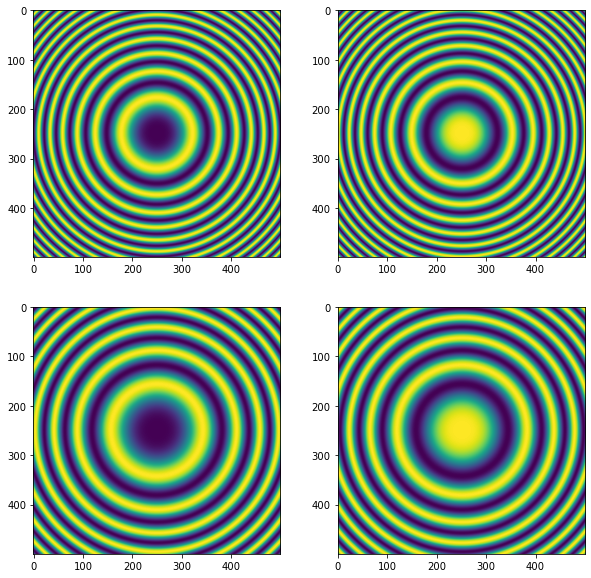

In [2]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt

def reflected_rings(r,R,lmbda): #反射干涉
    z = 4*np.sin(2*np.pi*(R-np.sqrt(R**2-r**2))/lmbda)**2
    return z
def transmission_rings(r,R,lmbda): #透射干涉
    z = 4*np.cos(2*np.pi*(R-np.sqrt(R**2-r**2))/lmbda)**2
    return z

x, y=np.mgrid[-3:3:500j,-3:3:500j]
r = np.sqrt(x**2+y**2)

lmbda = 5e-4
R=1000

fig, axes = plt.subplots(2,2,figsize=(10,10))
funcs = [reflected_rings, transmission_rings, 
         reflected_rings, transmission_rings]
ims = ['im1','im2','im3','im4']
axs = axes.ravel()

for i in range(4):
    ims[i] = axs[i].imshow(funcs[i](r, R, lmbda), animated=True)

def update(i):
    Rs = [1000+10*i, 1000+10*i, 1000, 1000]
    lmbdas = [5e-4, 5e-4, 5e-4+1e-5*i, 5e-4+1e-5*i]
    for i in range(4):
        ims[i].set_array(funcs[i](r,Rs[i],lmbdas[i]))
 
    return ims

from matplotlib import animation
anim = animation.FuncAnimation(fig, update, frames = 200,
                               interval = 20, blit = True)

anim.save('newtonrings.mp4', fps=30)
plt.show()

##### 27. 画出等容，等压，等温曲线

##### 28.画出表面水波的干涉图样

##### 29.画摆轮线$x=t-R\sin t, y=R\cos t (R<1)$。$t$为参数。

In [8]:
R = 0.5
t = np.linspace(0,10,100)
x = t-R*np.sin(t)
y = R*np.cos(t)
plt.plot(x,y)

##### 30. 画两端固定的弦的级数解图形
$u(x,t)=\sum_{n=1}^\infty\big(A_n\cos\frac{n\pi at}{l}+B_n\sin\frac{n\pi at}{l}\big)\sin\frac{n\pi x}{l}$

其中的系数可以利用下面的公式做积分计算:

$A_n=\frac{2}{l}\int_0^l\varphi(\xi)\sin\frac{n\pi\xi}{l}d\xi$

$B_n=\frac{2}{n\pi a}\int_0^l\varphi(\xi)\sin\frac{n\pi\xi}{l}d\xi$

其中位移$\varphi$和初速度$\psi$分别为
(1)

$\varphi(x) = \left\{
   \begin{aligned} \sin\frac{7\pi x}{l} \big(\frac{3l}{7}\le x \le \frac{4l}{7}\big), 
   \\ 0 \big(x<\frac{3l}{7} 或 x>\frac{4l}{7}\big)
   \end{aligned}\right.$
   
   $\psi(x)=0$
   
(2)

$\varphi(x)=0$

$\psi(x)=\left\{
   \begin{aligned} 1 \big(\frac{3l}{7}\le x \le \frac{4l}{7}\big), 
   \\ 0 \big(x<\frac{3l}{7} 或 x>\frac{4l}{7}\big)
   \end{aligned}\right.$

In [34]:
#初始位移和速度(1)
def phi_1(x, l):
    if (x<=3*l/7.) or (x>=4*l/7.):
        phi = 0
    else:
        phi = np.sin(7*np.pi*x/l)
    return(phi,0)
#初始位移和速度(2)
def phi_2(x, l):
    if (x<=3*l/7.) or (x>=4*l/7.):
        psi = 0
    else:
        psi = 1
    return(0,psi)

In [56]:
#系数计算
from scipy.integrate import quad
def fa(x,l,n):
    phi,_ = phi_1(x,l)
    return phi*np.sin(n*np.pi*x/l)
def fb(x,l,n):
    _,psi = phi_1(x,l)
    return psi*np.sin(n*np.pi*x/l)
def A_n(x,l,n):
    return 2/l*quad(fa,0,l,args=(l,n),limit=1000)[0]
def B_n(x,l,n,a=1):
    return 2/(n*np.pi*a)*quad(fb,0,l,args=(l,n),limit=1000)[0]

In [53]:
#级数解
def u(x,t, a=1, l=1, N=3):
    sm = 0
    for n in range(1,N):
        s1 = A_n(x,l,n)*np.cos(n*np.pi*a*t/l)+B_n(x,l,n)*np.sin(n*np.pi*a*t/l)
        sm += s1 * np.sin(n*np.pi*x/l)
    return sm

In [59]:
x = np.linspace(0,5,100)
t = np.linspace(0,10,100)
X,T = np.meshgrid(x,t)
U = u(X,T)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


In [60]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,T,U)